In [1]:
# Strive2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

## QRCodeDetector

WIFI:T:WPA2;S:iMore;P:iMore12345678;; [[[601.69604 425.61166]
  [837.0273  363.13437]
  [915.8054  595.2106 ]
  [679.84973 661.6051 ]]]


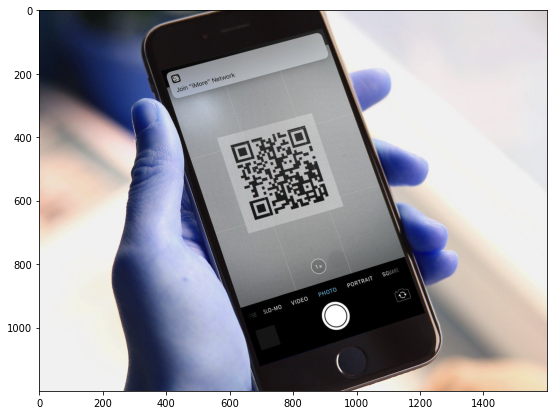

In [2]:
qr_code = cv2.imread('images/qr_code2.jpg', cv2.IMREAD_UNCHANGED)
detector = cv2.QRCodeDetector()

# data=message in qr code, bounding_box=actual qr code in image
data, bounding_box, straight_qr_code = detector.detectAndDecode(qr_code)
print(data, bounding_box)

plt.figure(figsize=(10,7))
plt.imshow(qr_code)

-1

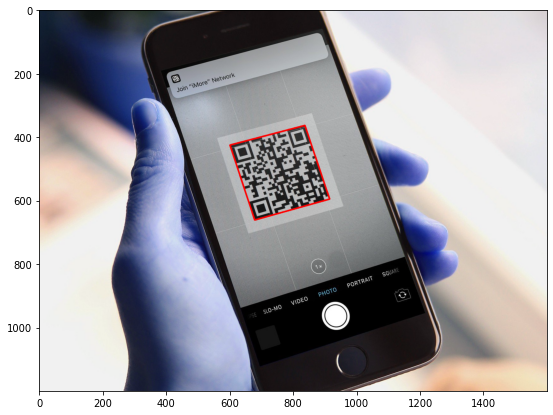

In [3]:
# draw a rectangle around the qr code
qr_code_copy = qr_code.copy()

if bounding_box is not None:
    n_lines = len(bounding_box)

    for i in range(n_lines):
        point1 = tuple(bounding_box[i][0])
        point2 = tuple(bounding_box[i][1])
        point3 = tuple(bounding_box[i][2])
        point4 = tuple(bounding_box[i][3])
        pts = np.array([point1, point2, point3, point4], np.int32).reshape((-1,1,2))
        cv2.polylines(qr_code_copy, [pts], True, (255,0,0), 3)

        # save the qr region to disk
        top_left_x = int(min([ point1[0], point2[0], point3[0], point4[0] ]))
        top_left_y = int(min([ point1[1], point2[1], point3[1], point4[1]]))
        bot_right_x = int(max([ point1[0], point2[0], point3[0], point4[0]]))
        bot_right_y = int(max([ point1[1], point2[1], point3[1], point4[1]]))

        crop = qr_code_copy[top_left_y:bot_right_y+1, top_left_x:bot_right_x+1]
        cv2.imwrite('images/saved_qr_code.jpg', crop)

plt.figure(figsize=(10,7))
plt.imshow(qr_code_copy)

cv2.imshow('QR Code', crop)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)